## Klassifikasjon med riktige og falske prediksjoner

Filen "sonar.csv" inneholder sonarsignaler fra metallsylindre og stein som ligger i forskjellige vinkler og under forskjellige forhold. Hvert sonarsignal består av 60 tall mellom 0.0 og 1.0 som representerer energien innenfor et bestemt frekvensbånd, over en viss tidsperiode. Tilknyttet hvert datapunkt har vi kategorien "R" for stein og "M" for metallsylinder. 

Først laster vi inn pakkene vi trenger for denne oppgaven. 

In [2]:
import numpy as np 
import pandas as pd

import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Så leser vi inn data. 

In [14]:
# lese inn data
df_sonar = pd.read_csv("data/sonar.csv", header=None)
df_sonar.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


Så deler vi data i sonarsignal $X$ og kategori $y$. 

In [15]:
# Sonarsignal X og kategori y
X = df_sonar.iloc[:, :59]
y = df_sonar.iloc[:, 60]

Nå deler vi data i trenings- og testdata. På treningsdata skal vi tilpasse en modell for å predikere y hvis X er gitt. Så bruker vi testdata for å finne ut hvor god denne modellen faktisk er. Senere kommer vi til å dele data i trenings-, validerings- og testdata. Det trenger vi når vi vil tilpasse flere modeller og velge ut den modellen som passer best til data. Men for nå bare ser vi på en modell, så det er nok med trenings- og testdata. 

In [16]:
# dele i trenings- og testdata
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Nå tilpasser vi en logistisk regresjonsmodell på treningsdata og bruker den for å predikere y på testdata. Vi vil snakke mer om logistiske regresjonsmodeller senere, for nå bruker vi det bare som eksempel. 

In [17]:
# logistisk regresjonsmodell
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

Ved bruk av en del av treningsdataene har vi nå laget en enkel modell for å forutsee om data tilsvarer "R" eller "M". Med testdataene regner vi nå ut konfusjonsmatrisen, 

|               | Predikert S (PS)         | Predikert M (PM) |
|---            |---                       |---               |
|Faktisk S (FS) | P(FS \& PS)              | P(FS \& PM)      |
|Faktisk M (FM) | P(FM \& PS)              | P(FM \& PM)      |

In [18]:
# konfusionmatrise
cm = confusion_matrix(y_test, pred, labels=('R', 'M'), normalize='all')
print(cm)

[[0.32692308 0.17307692]
 [0.03846154 0.46153846]]


Vi visualiserer konfusjonsmatrisen. Vi skal se mer på visualisering senere i kurset, så for nå kan du bare kjøre koden og se på den genererte figuren. 

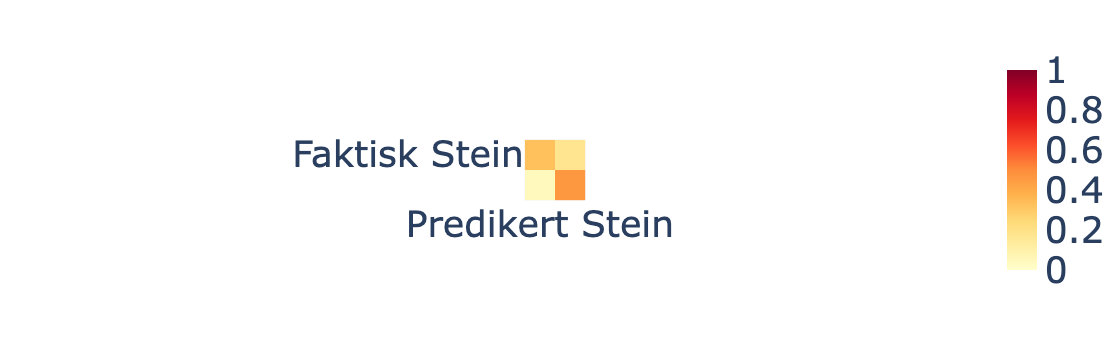

In [19]:
# visualisering av konfusjonsmatrisen
cm_df = pd.DataFrame(cm, 
                     columns=["Predikert Stein", "Predikert Mine"], 
                     index=["Faktisk Stein", "Faktisk Mine"])
fig = px.imshow(cm_df, color_continuous_scale='YlOrRd', zmin=0, zmax=1)
fig.update_layout(font=dict(size=36))
fig.show()

Basert på denne konfusjonsmatrissen skal vi vurdere kvaliteten av modellen. For å gjøre det regner vi ut forskjellige sannsynligheter og betingte sannsynligheter. Vi begynner med et enkelt spørsmål om datasettet: 

Hvor mange signaler i hele datasettet kommer fra metallsylindre og hvor mange fra stein?

In [20]:
# totalt antall miner og stein
n_sonar = y.value_counts()
print(n_sonar)

60
M    111
R     97
Name: count, dtype: int64


Hva er sannsynligheten for at vi predikerer riktig?

In [21]:
# sannsynlighet for riktig prediskjon
p_riktig = cm[0, 0] + cm[1, 1]
print(p_riktig)

0.7884615384615385


Hva er sannsynligheten for at vi predikerer at det er en mine hvis det faktisk er en stein?

In [22]:
# predikert mine, faktisk stein
p_pred_mine_faktisk_stein = cm[0, 1] / (cm[0, 1] + cm[0, 0])
print(p_pred_mine_faktisk_stein)

0.34615384615384615


Hva er sannsynligheten for at det faktisk er en mine hvis vi predikerer at det er en mine?

In [23]:
# faktisk mine, predikert mine
p_fm_pm = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print(round(p_fm_pm, 3))

0.727


Hva er sensitiviteten av testen for at det er en mine, dvs sannsynligheten at vi predikerer en mine hvis det faktisk er en mine?

In [24]:
# sensitivitet 
sensitivitet = cm[1, 1] / (cm[1, 1] + cm[1, 0])
print(sensitivitet)

0.9230769230769231


Hva er spesifiteten av testen for at det er en mine, dvs sannsynligheten at vi predikerer en stein hvis det faktisk er en stein?

In [34]:
# spesifitet
spesifitet = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print(spesifitet)

0.6538461538461539


Beskriv hvor godt denne modellen klarer å skille mellom stein og miner i to setninger. 

Modellen presterer ganske bra, den predikterer riktig med 78,8 prosent.
Sensitiviteten er høy, hvis det er mine tilstede er det 92% sikkert at den finner den, 
spesifisiteten er lavere, noe som betyr den ofte reagerer på steiner når miner ikke er tilstede.